# LetsGrowMoreVIP - Data Science Internship
Beginner Level Task-2 -Stock Market Prediction And Forecasting Using Stacked LSTM

Completed by - Siddharth Maheshwar Wagh


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df1.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
# Sorting the data with respect to date
df1['Date']=pd.to_datetime(df1['Date'])
df2=df1.sort_values(by='Date')
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
# ordering the index
df2.reset_index(inplace=True)
df2

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


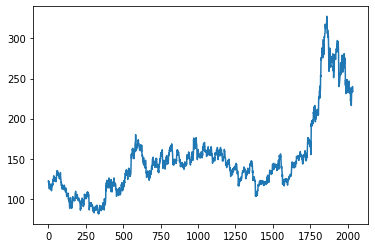

In [7]:
#plotting graph at Open
plt.plot(df2['Open'])

In [8]:
df3=df2['Open']

In [9]:
#Scaling feature 'Open' 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(np.array(df3).reshape(-1,1))
df3

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [10]:
# Splitting data into training and testing 

training_size = int(len(df3)*0.70)
test_size = len(df3) - training_size


train_data = df3[0:training_size,:]
test_data = df3[training_size:len(df3), :1]

In [11]:

from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df3, test_size=0.2, random_state=25)

training_data.shape[0], testing_data.shape[0]

(1628, 407)

In [12]:
#convert an array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [13]:

time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [14]:
#Reshape input required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [16]:
# Using Stacked LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, validation_split=0.1,
          epochs=60, batch_size=64, verbose=1)


Epoch 1/60
19/19 [==============================] - 6s 154ms/step - loss: 0.0115 - val_loss: 0.0011
Epoch 2/60
19/19 [==============================] - 2s 114ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 3/60
19/19 [==============================] - 2s 115ms/step - loss: 9.4225e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 2s 122ms/step - loss: 8.2767e-04 - val_loss: 0.0010
Epoch 5/60
19/19 [==============================] - 2s 117ms/step - loss: 8.3137e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 2s 117ms/step - loss: 7.9819e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 2s 111ms/step - loss: 7.8105e-04 - val_loss: 9.6851e-04
Epoch 8/60
19/19 [==============================] - 2s 101ms/step - loss: 7.5058e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 3s 140ms/step - loss: 7.0601e-04 - val_loss: 8.9026e-04
Epoch 10/60
19/19 [==============================] - 3s 137ms/st

In [19]:
#Prediction of scaled test set
test_predict = model.predict(X_test)


16/16 [==============================] - 2s 25ms/step


In [20]:
#transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)


In [21]:
test_predict1


array([[144.39388 ],
       [144.88425 ],
       [145.15291 ],
       [143.99632 ],
       [141.63539 ],
       [140.04652 ],
       [139.77554 ],
       [140.68983 ],
       [141.86694 ],
       [142.26408 ],
       [142.37463 ],
       [142.29013 ],
       [143.40182 ],
       [144.18175 ],
       [146.43953 ],
       [148.87927 ],
       [147.28424 ],
       [144.9911  ],
       [143.8755  ],
       [143.69186 ],
       [147.4739  ],
       [151.93216 ],
       [154.86926 ],
       [155.75815 ],
       [154.55603 ],
       [153.99516 ],
       [153.53372 ],
       [153.5442  ],
       [155.07545 ],
       [155.84477 ],
       [155.96149 ],
       [154.57516 ],
       [152.59413 ],
       [148.5237  ],
       [144.32881 ],
       [142.40105 ],
       [141.9927  ],
       [141.96582 ],
       [140.94337 ],
       [138.77325 ],
       [135.79102 ],
       [133.87357 ],
       [130.12007 ],
       [127.644554],
       [126.4796  ],
       [125.46456 ],
       [125.36748 ],
       [125.4